   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0             

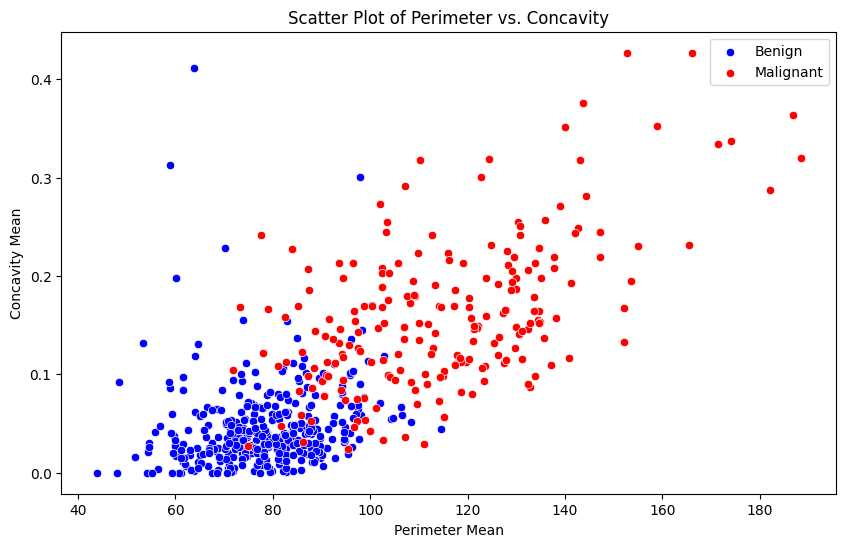

Model Accuracy: 0.95


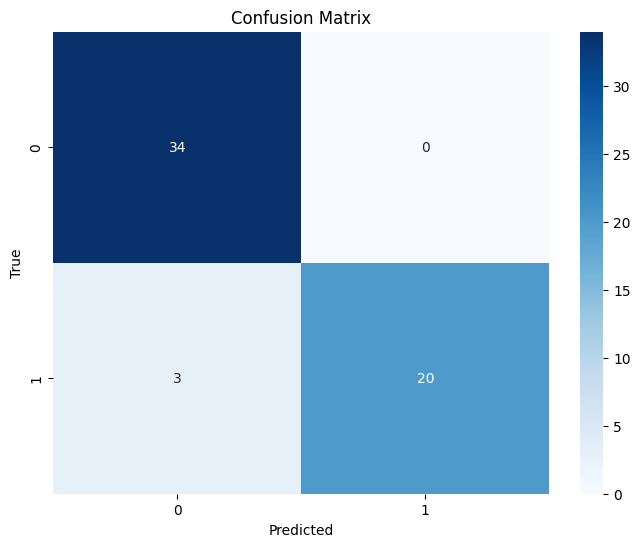

In [2]:
#https://www.kaggle.com/datasets/erdemtaha/cancer-data
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load your dataset
df = pd.read_csv('Cancer_Data.csv')

# Data preprocessing
df.drop(['Unnamed: 32', 'id'], axis='columns', inplace=True)
df = pd.get_dummies(df, columns=['diagnosis'], drop_first=False)
df.drop(['diagnosis_B'], axis='columns', inplace=True)
df['diagnosis_M'] = df['diagnosis_M'].astype(int)

# Display initial data
print(df.head())

# Split data into benign and malignant
df0 = df[df['diagnosis_M'] == 0]  # Benign
df1 = df[df['diagnosis_M'] == 1]  # Malignant

# Visualize the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='perimeter_mean', y='concavity_mean', data=df0, color='blue', label='Benign')
sns.scatterplot(x='perimeter_mean', y='concavity_mean', data=df1, color='red', label='Malignant')
plt.title('Scatter Plot of Perimeter vs. Concavity')
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.legend()
plt.show()

# Prepare data for training
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['diagnosis_M'], axis='columns'), df['diagnosis_M'], train_size=0.9, random_state=1)

# Train the SVM model
model = SVC(C=10)
model.fit(X_train, Y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
score = model.score(X_test, Y_test)
print(f'Model Accuracy: {score:.2f}')

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


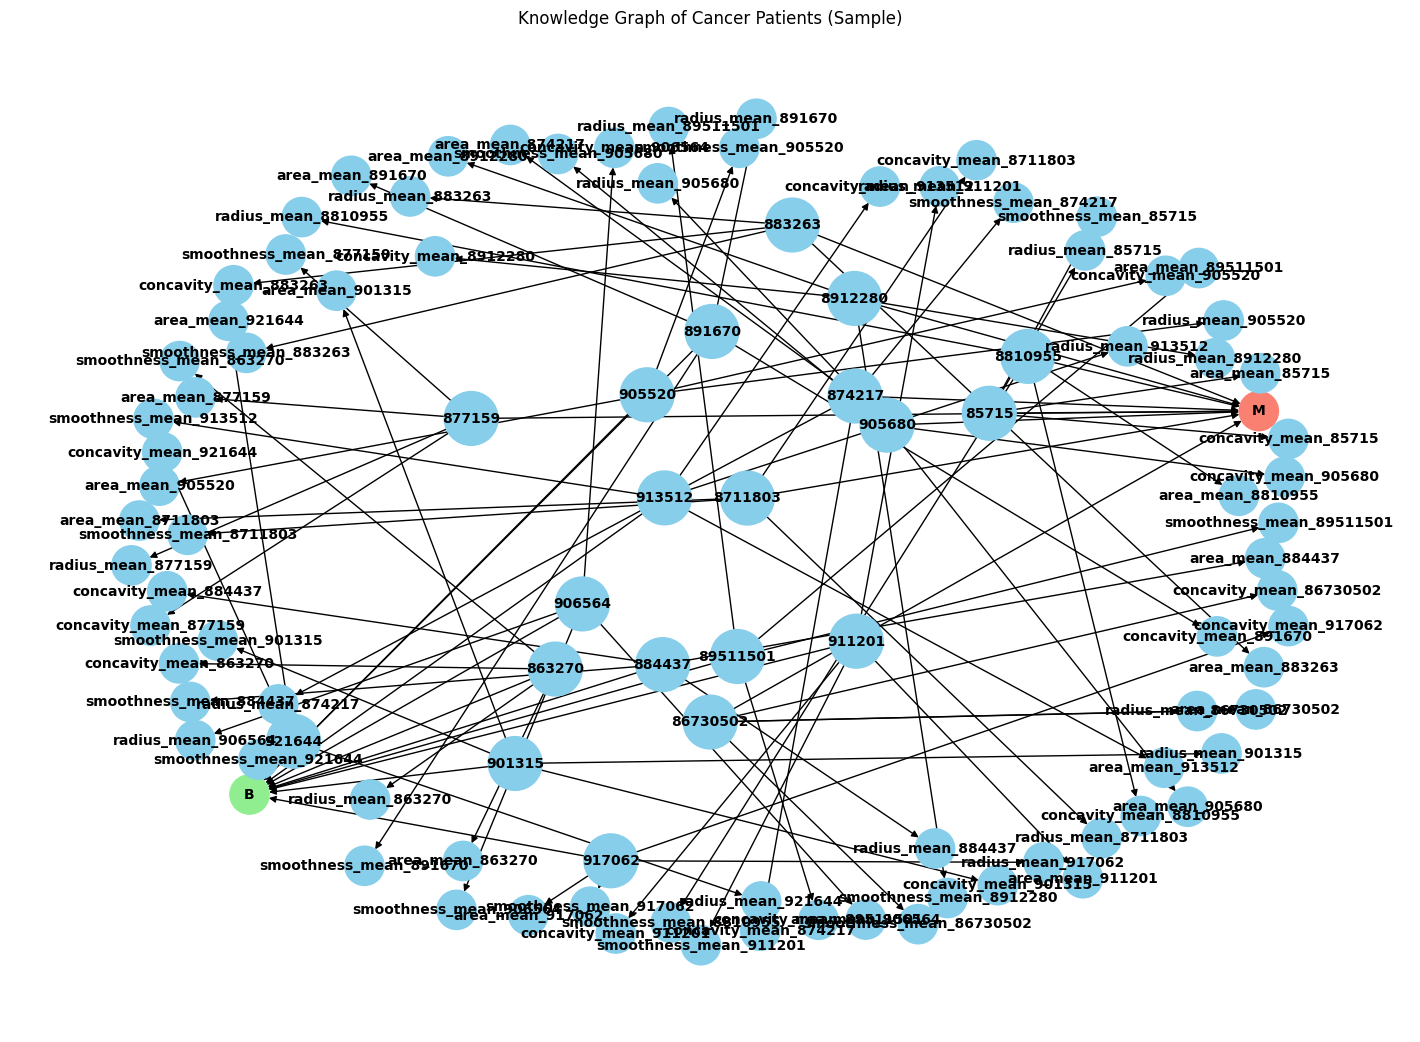

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Cancer_Data.csv')

# Sample 20 rows from the dataframe
df_sample = df.sample(n=20, random_state=1)

# Define key characteristics to include
top_characteristics = [
    'radius_mean',
    'area_mean',
    'smoothness_mean',
    'concavity_mean',
]

# Create a directed graph
G = nx.DiGraph()

# Add patients and their diagnoses
for _, row in df_sample.iterrows():
    patient_id = row['id']
    diagnosis = row['diagnosis']

    # Add patient node
    G.add_node(patient_id, label='Patient', diagnosis=diagnosis)

    # Create a relationship to the diagnosis
    G.add_node(diagnosis, label='Diagnosis')
    G.add_edge(patient_id, diagnosis, relationship='HAS_DIAGNOSIS')

    # Add a limited number of characteristics
    for char in top_characteristics:
        char_value = row[char]
        char_node = f"{char}_{patient_id}"  # Unique node name for each characteristic

        # Add characteristic node with its value
        G.add_node(char_node, label='Characteristic', value=char_value)
        G.add_edge(patient_id, char_node, relationship='HAS_CHARACTERISTIC')

# Draw the graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=1.0)  # Use spring layout for better spacing

# Color nodes based on diagnosis
node_colors = [
    'lightgreen' if G.nodes[n]['label'] == 'Diagnosis' and n == 'B' else
    'salmon' if G.nodes[n]['label'] == 'Diagnosis' and n == 'M' else
    'skyblue' for n in G.nodes
]

# Adjust node sizes
node_sizes = [1500 if G.nodes[n]['label'] == 'Patient' else 800 for n in G.nodes]

# Visualize the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=10, font_weight='bold', arrows=True)
plt.title('Knowledge Graph of Cancer Patients (Sample)')
plt.show()


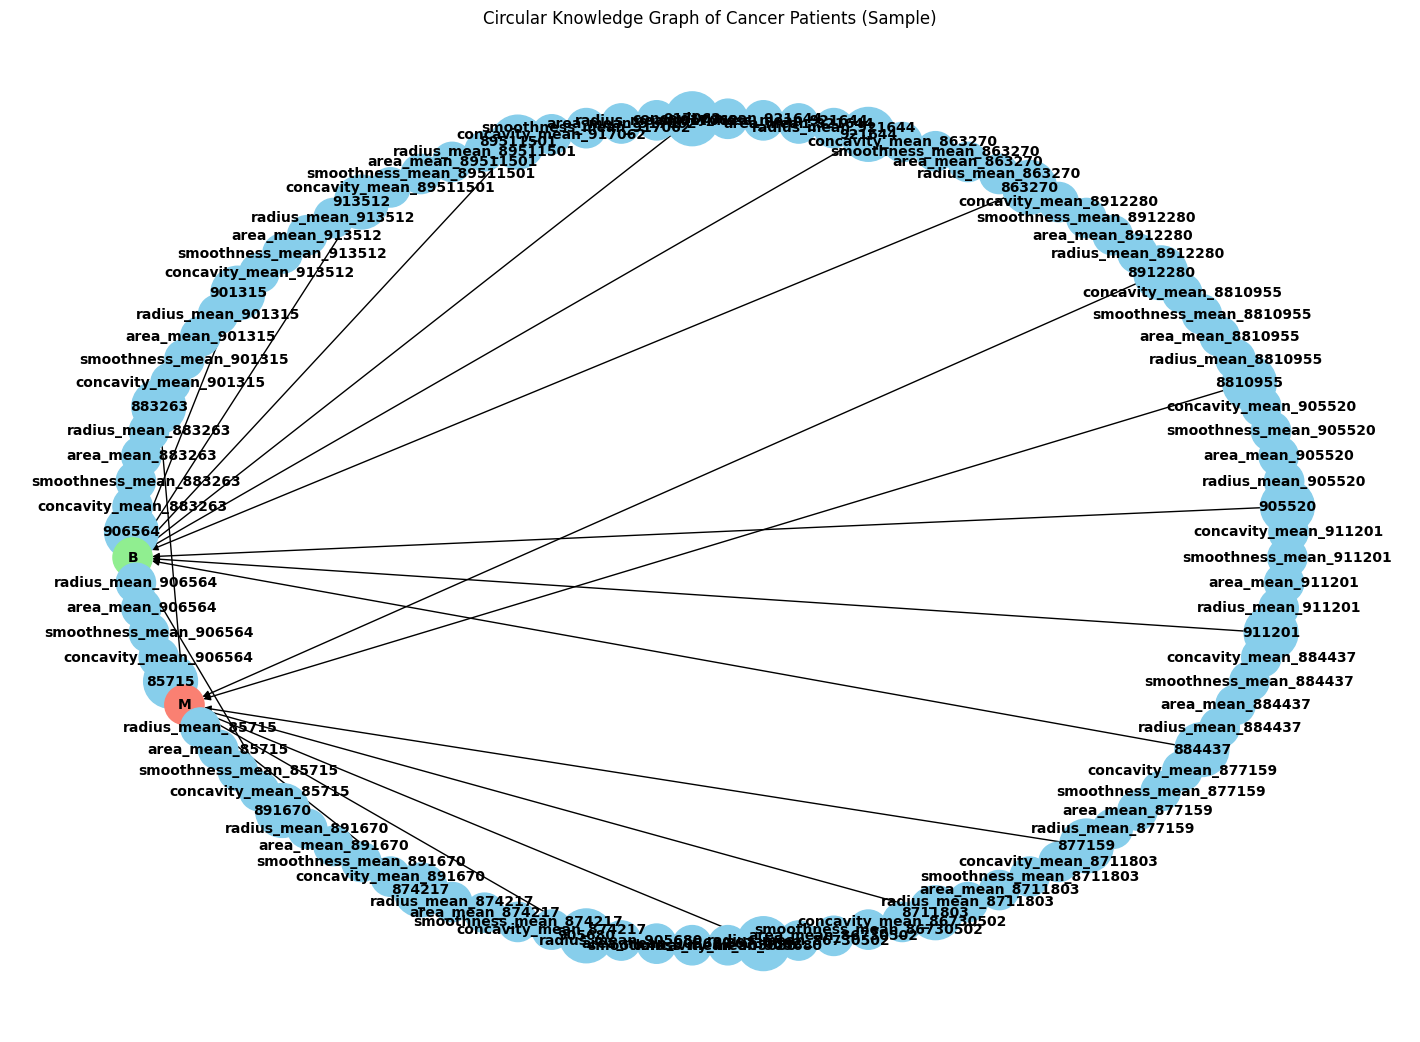

In [4]:
plt.figure(figsize=(14, 10))
pos = nx.shell_layout(G)

# Color nodes based on diagnosis
node_colors = [
    'lightgreen' if G.nodes[n]['label'] == 'Diagnosis' and n == 'B' else
    'salmon' if G.nodes[n]['label'] == 'Diagnosis' and n == 'M' else
    'skyblue' for n in G.nodes
]

# Adjust node sizes
node_sizes = [1500 if G.nodes[n]['label'] == 'Patient' else 800 for n in G.nodes]

# Visualize the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=10, font_weight='bold', arrows=True)
plt.title('Circular Knowledge Graph of Cancer Patients (Sample)')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

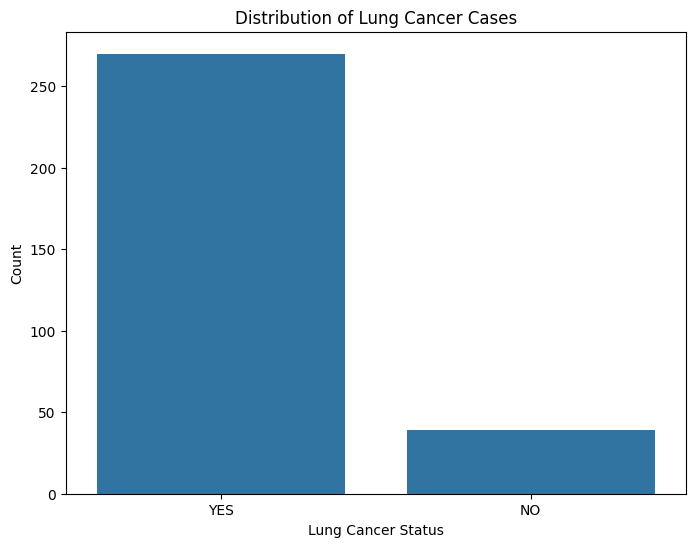

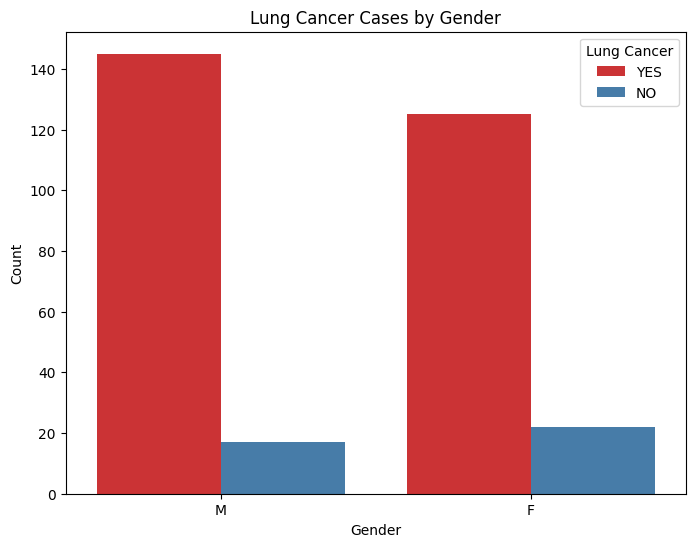

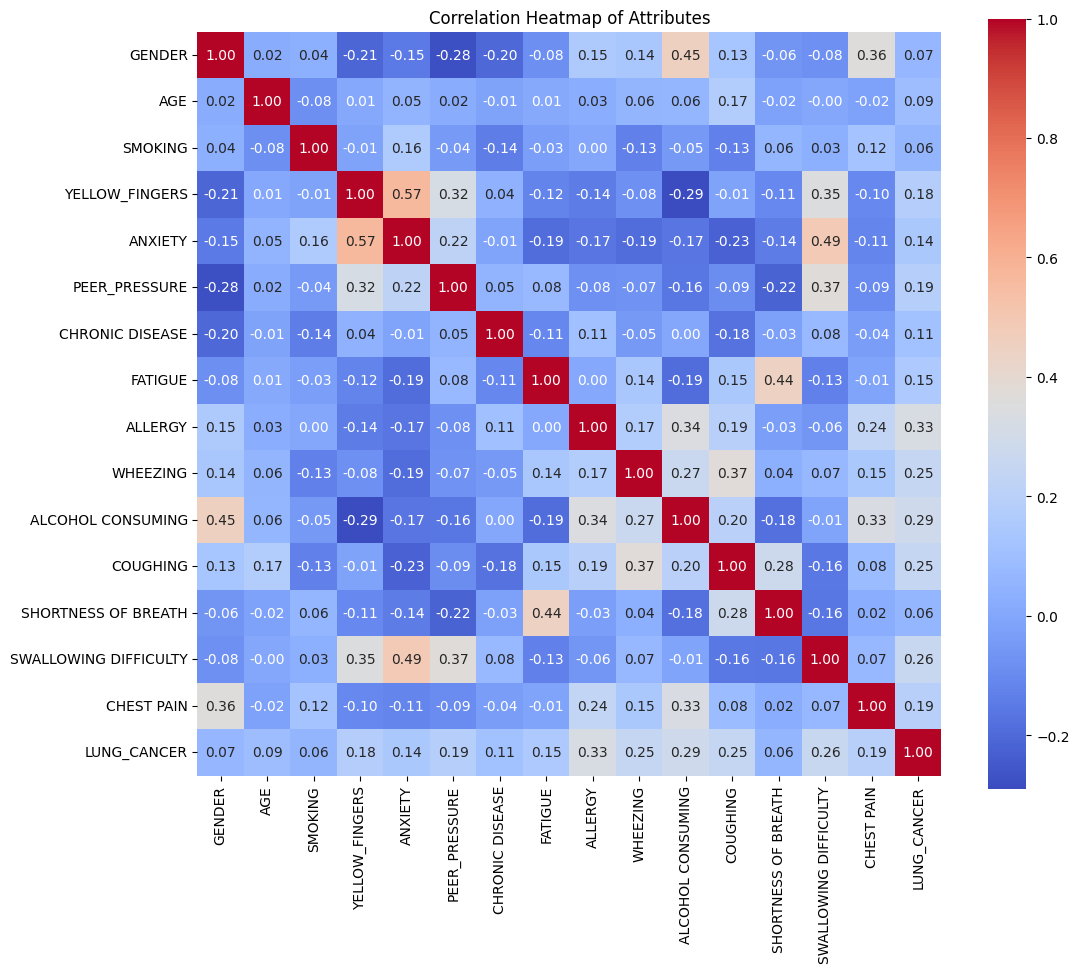

In [5]:
#https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer
df = pd.read_csv('Lung_Cancer_Data.csv')

df.columns = df.columns.str.strip().str.upper()

print(df.info())
print(df.head())


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='LUNG_CANCER')
plt.title('Distribution of Lung Cancer Cases')
plt.xlabel('Lung Cancer Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GENDER', hue='LUNG_CANCER', palette='Set1')
plt.title('Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Lung Cancer')
plt.show()

df_numeric = df.copy()
df_numeric['GENDER'] = df_numeric['GENDER'].map({'M': 1, 'F': 0})
df_numeric['LUNG_CANCER'] = df_numeric['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap of Attributes')
plt.show()



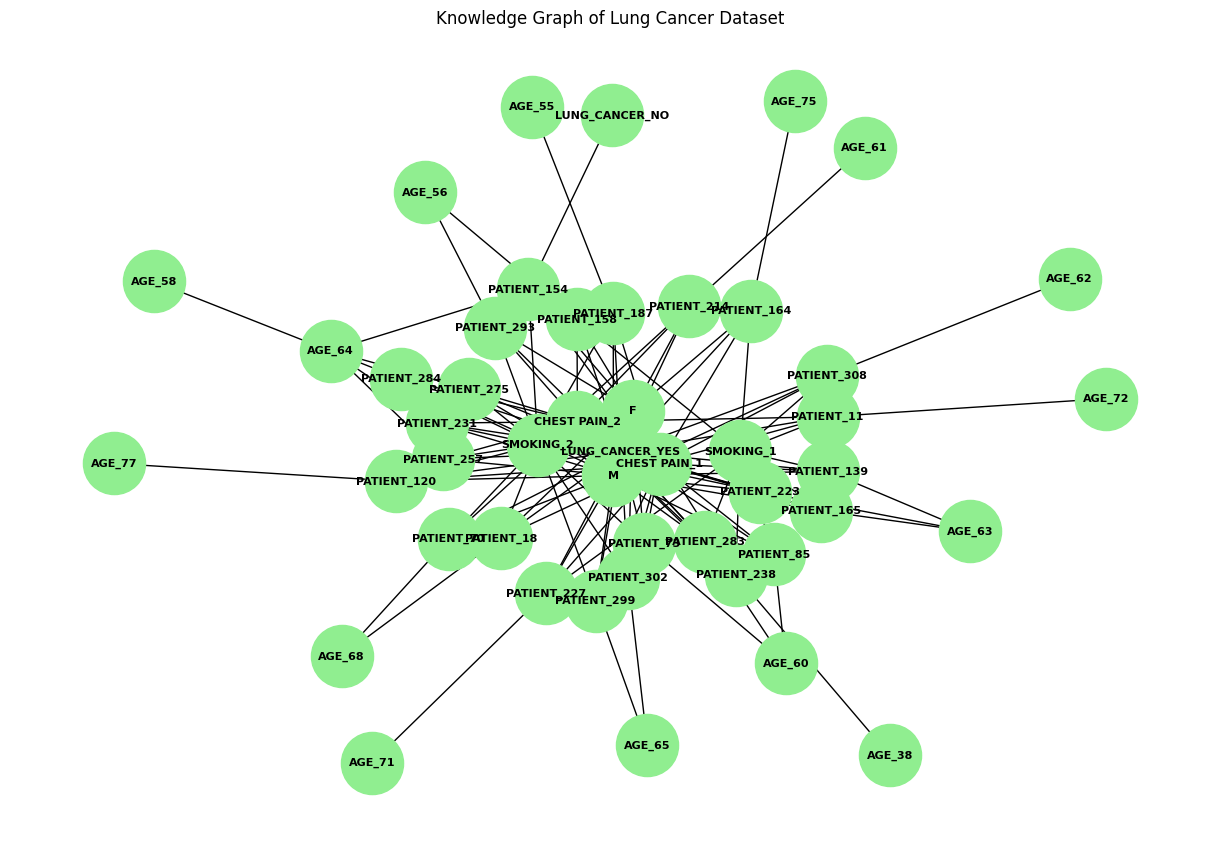

In [6]:
G = nx.Graph()

# Randomly sample 25 rows from the dataframe
subset_df = df.sample(n=25, random_state=1)

# Adding nodes and edges
for index, row in subset_df.iterrows():
    patient_id = f"PATIENT_{index}"  # Define a unique patient ID
    G.add_node(patient_id, label='Patient')

    # Add gender node
    gender = row['GENDER']
    G.add_node(gender, label='Gender')
    G.add_edge(patient_id, gender)

    # Limit connections to age and a few key attributes
    G.add_node(f"AGE_{row['AGE']}", label='Age')
    G.add_edge(patient_id, f"AGE_{row['AGE']}")

    # Select key attributes to connect
    key_attributes = ['SMOKING', 'CHEST PAIN', 'LUNG_CANCER']
    for attr in key_attributes:
        attr_value = row[attr]
        if pd.notna(attr_value):
            G.add_node(f"{attr}_{attr_value}", label=attr)
            G.add_edge(patient_id, f"{attr}_{attr_value}")

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
node_labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=node_labels, node_size=2000, node_color='lightgreen', font_size=8, font_weight='bold', arrows=True)
plt.title("Knowledge Graph of Lung Cancer Dataset")
plt.show()